# Importing the relevant libraries

In [3]:
import numpy as np
import pandas as pd
from scipy import stats
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.model_selection import cross_val_score

# Data Preprocessing

### Importing the Database

In [4]:
df = pd.read_csv('ml_datasource.csv')
df.head()

,student_country,days_on_platform,minutes_watched,courses_started,practice_exams_started,practice_exams_passed,minutes_spent_on_exams,purchased
0,US,288,358.1,1,2,2,15.81,0
1,SG,260,1.7,1,1,0,16.00,0
2,TR,260,22.4,1,1,0,0.93,0
3,KE,259,18.8,1,1,1,14.63,0
4,IN,259,118.0,2,2,1,16.48,0


In [5]:
df.describe(include='all')

,student_country,days_on_platform,minutes_watched,courses_started,practice_exams_started,practice_exams_passed,minutes_spent_on_exams,purchased
count,17752,17761.000000,17761.000000,17761.000000,17761.000000,17761.000000,17761.000000,17761.000000
unique,171,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,IN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,3365,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,123.205112,31.082906,1.196442,0.277800,0.176341,1.242772,0.091830
std,NaN,90.675102,90.593660,0.646788,1.659998,1.099900,7.755386,0.288795
min,NaN,0.000000,0.100000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,42.000000,1.100000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,NaN,113.000000,6.800000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,NaN,204.000000,34.300000,1.000000,0.000000,0.000000,0.000000,0.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17761 entries, 0 to 17760
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   student_country         17752 non-null  object 
 1   days_on_platform        17761 non-null  int64  
 2   minutes_watched         17761 non-null  float64
 3   courses_started         17761 non-null  int64  
 4   practice_exams_started  17761 non-null  int64  
 5   practice_exams_passed   17761 non-null  int64  
 6   minutes_spent_on_exams  17761 non-null  float64
 7   purchased               17761 non-null  int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 1.1+ MB


In [7]:
df.isnull().sum()

student_country           9
days_on_platform          0
minutes_watched           0
courses_started           0
practice_exams_started    0
practice_exams_passed     0
minutes_spent_on_exams    0
purchased                 0
dtype: int64

In [8]:
def nulls_summary_table(df):
    """
    Returns a summary table showing null value counts and percentage
    
    Parameters:
    df (DataFrame): Dataframe to check
    
    Returns:
    null_values (DataFrame)
    """
    null_values = pd.DataFrame(df.isnull().sum())
    null_values[1] = null_values[0]/len(df)
    null_values.columns = ['null_count','null_pct']
    return null_values

nulls_summary_table(df)

,null_count,null_pct
student_country,9,0.000507
days_on_platform,0,0.000000
minutes_watched,0,0.000000
courses_started,0,0.000000
practice_exams_started,0,0.000000
practice_exams_passed,0,0.000000
minutes_spent_on_exams,0,0.000000
purchased,0,0.000000


In [9]:
#drop_df = df.copy()
#drop_df = drop_df.dropna() #drop null values
#drop_df.info()

In [10]:
#df_w = drop_df.copy()
df = df.drop(labels=['student_country','purchased'], axis=1)
df.head()

,days_on_platform,minutes_watched,courses_started,practice_exams_started,practice_exams_passed,minutes_spent_on_exams
0,288,358.1,1,2,2,15.81
1,260,1.7,1,1,0,16.00
2,260,22.4,1,1,0,0.93
3,259,18.8,1,1,1,14.63
4,259,118.0,2,2,1,16.48


### Removing Outliers

<Axes: >

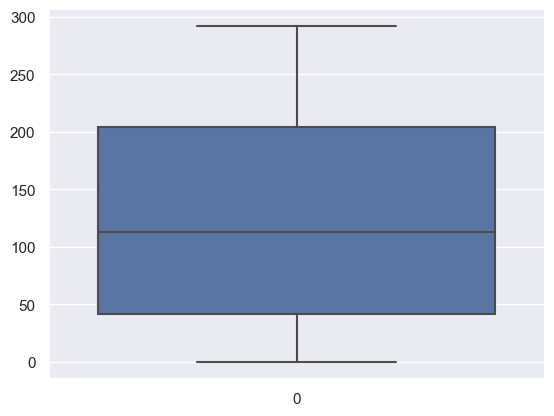

In [11]:
sns.boxplot(df['days_on_platform']) 

<Axes: >

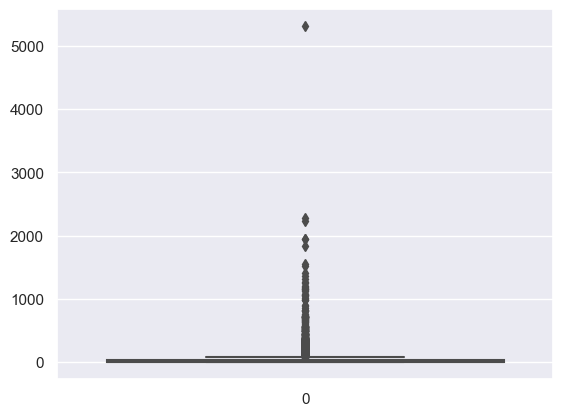

In [12]:
sns.boxplot(df['minutes_watched'])

<Axes: >

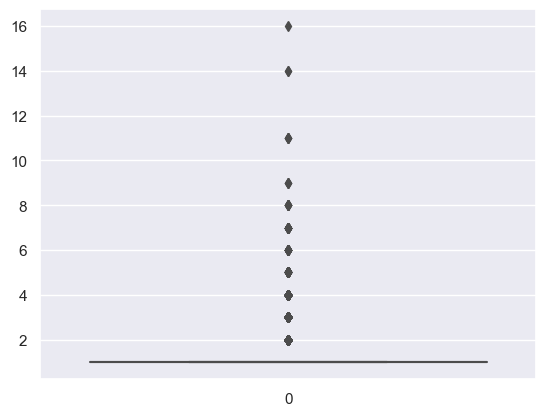

In [13]:
sns.boxplot(df['courses_started'])

<Axes: >

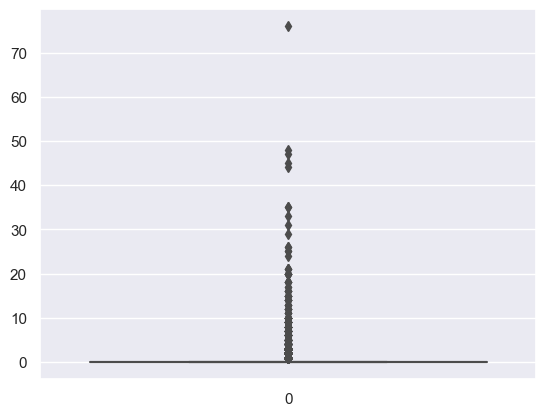

In [14]:
sns.boxplot(df['practice_exams_started'])

<Axes: >

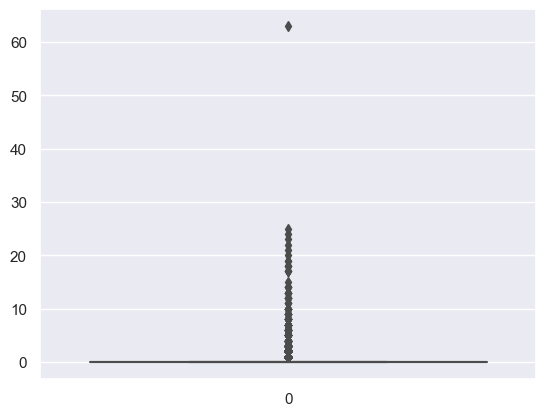

In [15]:
sns.boxplot(df['practice_exams_passed'])

In [16]:
def extract_outliers_from_boxplot(array):
    ## Get IQR
    iqr_q1 = np.quantile(array, 0.25)
    iqr_q3 = np.quantile(array, 0.75)
    med = np.median(array)

    # finding the iqr region
    iqr = iqr_q3-iqr_q1

    # finding upper and lower whiskers
    upper_bound = iqr_q3+(1.5*iqr)
    lower_bound = iqr_q1-(1.5*iqr)

    outliers = array[(array <= lower_bound) | (array >= upper_bound)]
    print('Outliers within the box plot are :{}'.format(outliers))
    return outliers

extract_outliers_from_boxplot(df['minutes_watched'])

Outliers within the box plot are :0        358.1
4        118.0
5        143.8
7        103.9
10       252.4
         ...  
17648    148.3
17677     96.7
17708    104.4
17711    214.6
17713    150.9
Name: minutes_watched, Length: 1464, dtype: float64


0        358.1
4        118.0
5        143.8
7        103.9
10       252.4
         ...  
17648    148.3
17677     96.7
17708    104.4
17711    214.6
17713    150.9
Name: minutes_watched, Length: 1464, dtype: float64

{'bodies': [<matplotlib.collections.PolyCollection at 0x164141050>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x164151350>,
 'cmins': <matplotlib.collections.LineCollection at 0x1641eb210>,
 'cbars': <matplotlib.collections.LineCollection at 0x16414cc10>}

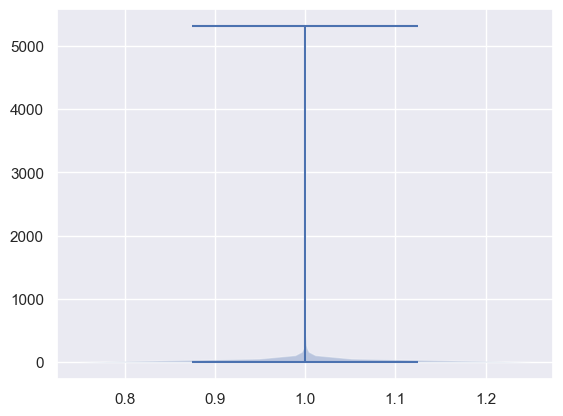

In [17]:
plt.violinplot(df['minutes_watched'])

In [18]:
minites_watched = df['minutes_watched']

def percentile_outliers(array,
                        lower_bound_perc,
                        upper_bound_perc):
    
    upper_bound = np.percentile(df['minutes_watched'], upper_bound_perc)
    lower_bound = np.percentile(df['minutes_watched'], lower_bound_perc)
    
    outliers = array[(array <= lower_bound) | (array >= upper_bound)]
    
    return outliers

def z_score_outliers(array,
                     z_score_lower,
                     z_score_upper):

    z_scores = stats.zscore(array)
    outliers = (z_scores > 1.96) | (z_scores < -1.96)
    
    return array[outliers]

In [19]:
outliers = percentile_outliers(df['minutes_watched'],
               upper_bound_perc = 99,
               lower_bound_perc = 1)

In [20]:
outliers

0         358.1
11        366.7
23       1118.3
30        360.2
42        429.2
          ...  
17727       0.1
17750       0.1
17752       0.1
17757       0.1
17760       0.1
Name: minutes_watched, Length: 1309, dtype: float64

In [21]:
z_score_lower = -1.96
z_score_upper = 1.96
z_score_outliers = [df['minutes_watched'],
                     z_score_lower,
                     z_score_upper]

In [22]:
z_score_outliers

[0        358.1
 1          1.7
 2         22.4
 3         18.8
 4        118.0
          ...  
 17756      0.8
 17757      0.1
 17758      7.8
 17759     10.4
 17760      0.1
 Name: minutes_watched, Length: 17761, dtype: float64,
 -1.96,
 1.96]

In [23]:
def z_score_removal(df, column, lower_z_score, upper_z_score):
    
    col_df = df[column]

    z_scores = stats.zscore(col_df)
    outliers = (z_scores > upper_z_score) | (z_scores < lower_z_score)
    return df[~outliers]

def percentile_removal(df, column, lower_bound_perc, upper_bound_perc):
    
    col_df = df[column]
    
    upper_bound = np.percentile(col_df, upper_bound_perc)
    lower_bound = np.percentile(col_df, lower_bound_perc)

    z_scores = stats.zscore(col_df)
    outliers = (z_scores > upper_bound) | (z_scores < lower_bound)
    return df[~outliers]

filtered_zdf = z_score_removal(df, 'minutes_watched', -1.96, 1.96)
filtered_pdf = percentile_removal(df, 'minutes_watched', lower_bound_perc = 1, upper_bound_perc = 99)

In [24]:
filtered_zdf.describe()

,days_on_platform,minutes_watched,courses_started,practice_exams_started,practice_exams_passed,minutes_spent_on_exams
count,17386.000000,17386.000000,17386.000000,17386.000000,17386.000000,17386.000000
mean,123.617968,22.095393,1.153974,0.184401,0.114345,0.801386
std,90.853626,33.823989,0.503586,1.044613,0.644647,4.686081
min,0.000000,0.100000,1.000000,0.000000,0.000000,0.000000
25%,41.000000,1.000000,1.000000,0.000000,0.000000,0.000000
50%,114.000000,6.600000,1.000000,0.000000,0.000000,0.000000
75%,204.000000,31.675000,1.000000,0.000000,0.000000,0.000000
max,292.000000,208.100000,16.000000,47.000000,22.000000,240.860000


In [25]:
filtered_pdf.describe()

,days_on_platform,minutes_watched,courses_started,practice_exams_started,practice_exams_passed,minutes_spent_on_exams
count,3902.000000,3902.000000,3902.000000,3902.000000,3902.000000,3902.000000
mean,109.827012,112.462942,1.581497,1.065607,0.707073,4.685569
std,91.744731,168.788526,1.138407,3.191215,2.194245,15.001021
min,0.000000,40.200000,1.000000,0.000000,0.000000,0.000000
25%,21.000000,48.300000,1.000000,0.000000,0.000000,0.000000
50%,85.000000,67.700000,1.000000,0.000000,0.000000,0.000000
75%,190.000000,112.575000,2.000000,1.000000,0.000000,3.350000
max,292.000000,5312.300000,16.000000,76.000000,63.000000,457.410000


### Checking for Multicollinearity

<Axes: >

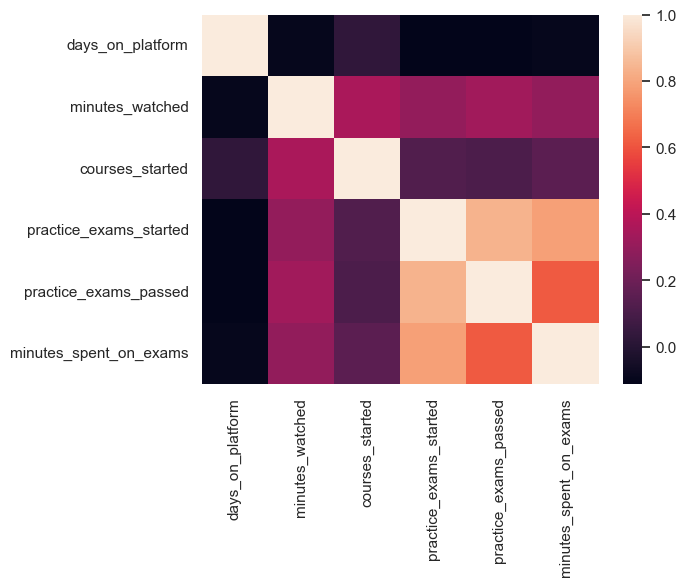

In [26]:
corr = filtered_zdf.corr()

sns.heatmap(corr)

<Axes: >

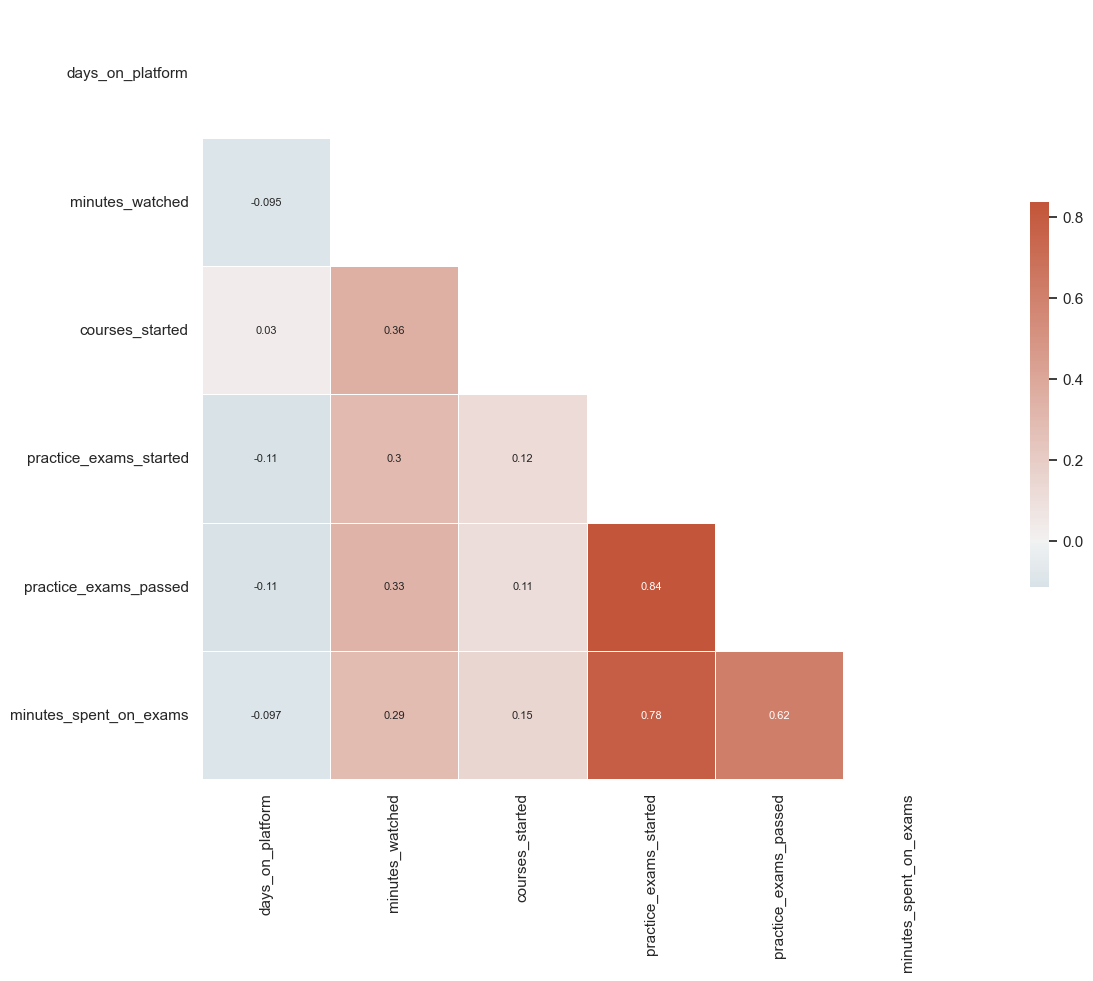

In [27]:
sns.set_theme(style="white")

# Compute the correlation matrix
corr = filtered_zdf.corr()

# Generate a mask for the upper triangle (otherwise this looks like the square we had above and is redundant)
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure 
f, ax = plt.subplots(figsize=(15, 10))

# Generate a custom diverging colormap (choose colors here)
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio 
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, annot_kws={"fontsize":8})

#obviously many of thes variables are HIGHLY correlated. Something we may want to explore is why Average percentage viewed is negatively related to RPM

### Dealing with NaN Values

In [28]:
def nulls_summary_table(df):
    """
    Returns a summary table showing null value counts and percentage
    
    Parameters:
    df (DataFrame): Dataframe to check
    
    Returns:
    null_values (DataFrame)
    """
    null_values = pd.DataFrame(df.isnull().sum())
    null_values[1] = null_values[0]/len(df)
    null_values.columns = ['null_count','null_pct']
    return null_values

nulls_summary_table(df)

,null_count,null_pct
days_on_platform,0,0.0
minutes_watched,0,0.0
courses_started,0,0.0
practice_exams_started,0,0.0
practice_exams_passed,0,0.0
minutes_spent_on_exams,0,0.0


In [29]:
filtered_zdf_final = filtered_zdf.drop(labels=['practice_exams_started'], axis=1)
filtered_zdf_final.describe()

,days_on_platform,minutes_watched,courses_started,practice_exams_passed,minutes_spent_on_exams
count,17386.000000,17386.000000,17386.000000,17386.000000,17386.000000
mean,123.617968,22.095393,1.153974,0.114345,0.801386
std,90.853626,33.823989,0.503586,0.644647,4.686081
min,0.000000,0.100000,1.000000,0.000000,0.000000
25%,41.000000,1.000000,1.000000,0.000000,0.000000
50%,114.000000,6.600000,1.000000,0.000000,0.000000
75%,204.000000,31.675000,1.000000,0.000000,0.000000
max,292.000000,208.100000,16.000000,22.000000,240.860000


In [30]:
filtered_zdf_final

,days_on_platform,minutes_watched,courses_started,practice_exams_passed,minutes_spent_on_exams
1,260,1.7,1,0,16.00
2,260,22.4,1,0,0.93
3,259,18.8,1,1,14.63
4,259,118.0,2,1,16.48
5,252,143.8,1,3,11.57
...,...,...,...,...,...
17756,0,0.8,1,0,0.00
17757,0,0.1,1,0,0.00
17758,0,7.8,1,0,0.00
17759,0,10.4,1,0,0.00


### Splitting the Data

In [31]:
zdf_alter = filtered_zdf_final.copy()
column_to_move = 'practice_exams_passed'
current_position = zdf_alter.columns.get_loc(column_to_move)
new_position = 4
column_to_move_series = zdf_alter.pop(column_to_move)
zdf_alter.insert(new_position, column_to_move, column_to_move_series)

zdf_alter

,days_on_platform,minutes_watched,courses_started,minutes_spent_on_exams,practice_exams_passed
1,260,1.7,1,16.00,0
2,260,22.4,1,0.93,0
3,259,18.8,1,14.63,1
4,259,118.0,2,16.48,1
5,252,143.8,1,11.57,3
...,...,...,...,...,...
17756,0,0.8,1,0.00,0
17757,0,0.1,1,0.00,0
17758,0,7.8,1,0.00,0
17759,0,10.4,1,0.00,0


In [32]:
X = zdf_alter.iloc[:, :-1].values
y = zdf_alter.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

### Encoding the Data

In [33]:
from sklearn.preprocessing import OrdinalEncoder
## Get the data we want to encode, convert to unique values
zdf_enc = np.asarray(zdf_alter[['practice_exams_passed']])

# define ordinal encoding
encoder = OrdinalEncoder()
# transform data
zdf_final = encoder.fit_transform(zdf_enc)
#print(pd.DataFrame(zdf_final))

# Creating a Logistic Regression Model

In [34]:
from sklearn.linear_model import LogisticRegression
logreg_classifier = LogisticRegression(random_state = 0)
logreg_classifier.fit(X_train, y_train)

/Users/boitumelomaseko/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [35]:
y_pred = logreg_classifier.predict(X_test)

In [36]:
#Logistic Regression Model Confusion Matrix and Accuracy Score
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[4081   10    2    0    1    0    0    0    0    2    0    0]
 [ 104   31    3    0    1    0    0    0    0    0    0    0]
 [  37   21    1    0    0    0    1    0    0    0    0    0]
 [   6    7    2    0    0    0    1    0    0    0    0    1]
 [   2    8    4    0    0    0    0    0    0    0    1    0]
 [   1    2    4    0    0    0    0    0    0    0    0    0]
 [   1    4    3    0    0    0    0    0    0    0    0    0]
 [   0    1    1    0    0    0    0    0    0    0    0    0]
 [   0    0    1    0    0    0    0    0    0    0    0    0]
 [   0    1    0    0    0    0    0    0    0    0    0    0]
 [   0    0    1    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0    0]]


0.9461697722567288

In [37]:
#Applying K-Fold cross validation to Logistic Regression
accuracies = cross_val_score(estimator = logreg_classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

/Users/boitumelomaseko/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_split.py:725: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
/Users/boitumelomaseko/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/boitumelomaseko/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or s

Accuracy: 94.62 %
Standard Deviation: 0.26 %


/Users/boitumelomaseko/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Creating a K-Nearest Neighbors Model

In [38]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [39]:
knny_pred = knn_classifier.predict(X_test)

In [40]:
#K-Nearest Neighbors Model Confusion Matrix and Accuracy Score
knncm = confusion_matrix(y_test, knny_pred)
print(knncm)
accuracy_score(y_test, knny_pred)

[[4080   13    2    0    0    1    0    0    0    0    0]
 [  82   46    9    1    1    0    0    0    0    0    0]
 [  29   22    7    1    0    0    1    0    0    0    0]
 [   7    7    0    2    0    0    1    0    0    0    0]
 [   3    5    2    2    0    1    2    0    0    0    0]
 [   1    0    3    2    0    1    0    0    0    0    0]
 [   1    0    1    4    0    0    2    0    0    0    0]
 [   1    0    1    0    0    0    0    0    0    0    0]
 [   0    0    0    1    0    0    0    0    0    0    0]
 [   0    0    0    0    1    0    0    0    0    0    0]
 [   0    0    1    0    0    0    0    0    0    0    0]]


0.9519208649643432

In [39]:
#Applying K-Fold cross validation to KNN Classifier
accuracies = cross_val_score(estimator = knn_classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

/Users/boitumelomaseko/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_split.py:725: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


Accuracy: 95.00 %
Standard Deviation: 0.38 %


# Creating a Support Vector Machines Model

In [40]:
from sklearn.svm import SVC
svm_classifier = SVC(kernel = 'linear', random_state = 0)
svm_classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [41]:
svmy_pred = svm_classifier.predict(X_test)

In [42]:
#Support Vector Machine Model Confusion Matrix and Accuracy Score
svmcm = confusion_matrix(y_test, svmy_pred)
print(svmcm)
accuracy_score(y_test, svmy_pred)

[[4084   12    0    0    0    0    0    0    0    0    0]
 [ 112   27    0    0    0    0    0    0    0    0    0]
 [  48   12    0    0    0    0    0    0    0    0    0]
 [  13    4    0    0    0    0    0    0    0    0    0]
 [  12    3    0    0    0    0    0    0    0    0    0]
 [   6    1    0    0    0    0    0    0    0    0    0]
 [   8    0    0    0    0    0    0    0    0    0    0]
 [   1    1    0    0    0    0    0    0    0    0    0]
 [   1    0    0    0    0    0    0    0    0    0    0]
 [   1    0    0    0    0    0    0    0    0    0    0]
 [   1    0    0    0    0    0    0    0    0    0    0]]


0.9457096848401196

In [1]:
#Applying K-Fold cross validation to SVM Classifier
#accuracies = cross_val_score(estimator = svm_classifier, X = X_train, y = y_train, cv = 10)
#print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
#print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

# Creating a Decision Trees Model

In [41]:
from sklearn.tree import DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [42]:
dty_pred = dt_classifier.predict(X_test)

In [43]:
#Decision Tree Model Confusion Matrix and Accuracy Score
dtcm = confusion_matrix(y_test, dty_pred)
print(dtcm)
accuracy_score(y_test, dty_pred)

[[4058   23   10    2    0    2    0    0    0    1    0]
 [  22   62   41    7    1    2    2    0    0    2    0]
 [  14   23   13    4    4    1    1    0    0    0    0]
 [   5    3    2    4    3    0    0    0    0    0    0]
 [   1    3    0    2    5    0    3    1    0    0    0]
 [   0    2    2    0    2    1    0    0    0    0    0]
 [   0    1    1    4    1    0    1    0    0    0    0]
 [   0    1    0    0    1    0    0    0    0    0    0]
 [   0    0    1    0    0    0    0    0    0    0    0]
 [   0    0    0    0    1    0    0    0    0    0    0]
 [   0    0    0    0    1    0    0    0    0    0    0]]


0.9533011272141707

In [44]:
#Applying K-Fold cross validation to Decision Tree Classifier
accuracies = cross_val_score(estimator = dt_classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 95.33 %
Standard Deviation: 0.28 %


/Users/boitumelomaseko/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_split.py:725: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


# Creating a Random Forests Model

In [45]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [46]:
rfy_pred = rf_classifier.predict(X_test)

In [47]:
#Random Forest Model Confusion Matrix and Accuracy Score
rfcm = confusion_matrix(y_test, rfy_pred)
print(rfcm)
accuracy_score(y_test, rfy_pred)

[[4066   20    7    2    0    1    0    0    0    0    0    0]
 [  24   83   26    4    0    1    1    0    0    0    0    0]
 [   7   33   15    2    2    0    1    0    0    0    0    0]
 [   3    7    3    1    2    0    0    0    0    1    0    0]
 [   1    3    3    3    2    0    2    1    0    0    0    0]
 [   0    1    4    1    0    0    1    0    0    0    0    0]
 [   0    1    2    3    0    0    2    0    0    0    0    0]
 [   0    1    0    1    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    1    0]
 [   0    0    1    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0    0]
 [   0    0    1    0    0    0    0    0    0    0    0    0]]


0.9590522199217851

In [48]:
#Applying K-Fold cross validation to Random Forest Classifier
accuracies = cross_val_score(estimator = rf_classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

/Users/boitumelomaseko/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_split.py:725: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


Accuracy: 95.67 %
Standard Deviation: 0.24 %
